In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from pathlib import Path
from tqdm import tqdm


In [17]:
import locale
# Set to German locale to get comma decimal separater
locale.setlocale(locale.LC_NUMERIC,"ru_RU.utf8")
plt.rcParams['axes.formatter.use_locale'] = True

In [18]:
plt.rcParams['axes.formatter.use_locale'] = True

In [4]:
import pandas as pd
import numpy as np
import math
import pickle

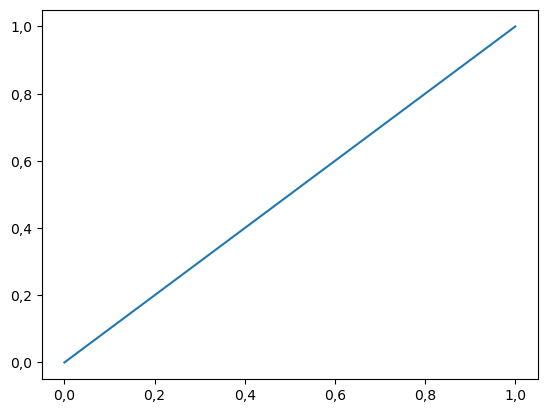

In [5]:
plt.rcParams['axes.formatter.use_locale'] = True
plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10))

In [20]:
import lnnclassifier.form_trajectories

In [7]:

list_of_files = []
subjectID = []
activityIDdict = { }
colNames = []
IMUhand = []
IMUchest = []
IMUankle = []
columns = []

list_of_files, subjectID, activityIDdict, colNames, IMUhand, IMUchest, IMUankle, columns = lnnclassifier.form_trajectories.load_indices()
len(columns)

54

## Загрузка данных

Объединим информацию из всех файлов в один датасет сопаставив каждому временному ряду человека и активность

In [9]:
dataCollection = lnnclassifier.form_trajectories.formDataFrame(list_of_files, columns)

In [10]:
dataCollection.head(20)

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,1
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,1
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,1
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,1
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,1
5,8.43,0,NaN,30.0,2.29959,8.82929,3.54710,2.26132,8.65762,3.77788,...,-0.016024,0.001050,-60.2954,-38.8778,-58.3977,1.0,0.0,0.0,0.0,1
6,8.44,0,NaN,30.0,2.33738,8.82900,3.54767,2.27703,8.77828,3.73230,...,-0.053934,0.015594,-60.6307,-38.8676,-58.2711,1.0,0.0,0.0,0.0,1
7,8.45,0,NaN,30.0,2.37142,9.05500,3.39347,2.39786,8.89814,3.64131,...,-0.039937,-0.000785,-60.5171,-38.9819,-58.2733,1.0,0.0,0.0,0.0,1
8,8.46,0,NaN,30.0,2.33951,9.13251,3.54668,2.44371,8.98841,3.62596,...,-0.010042,0.017701,-61.2916,-39.6182,-58.1499,1.0,0.0,0.0,0.0,1
9,8.47,0,NaN,30.0,2.25966,9.09415,3.43015,2.42877,9.01871,3.61081,...,-0.013923,0.014498,-60.8509,-39.0821,-58.1478,1.0,0.0,0.0,0.0,1


Отбираем только данные с нужных сенсоров (в данном случае с одно акселерометра) и ключи (человек, активность)

In [11]:
#selected_sensors = ['ankleGyro1', 'ankleGyro2', 'ankleGyro3']
selected_sensors = ['ankleGyro1', 'ankleGyro2', 'ankleGyro3', 'chestGyro1', 'chestGyro2', 'chestGyro3', 'handGyro1', 'handGyro2', 'handGyro3']
selected_features = ['activityID'] + selected_sensors + ['subject_id']
activityID = [3, 4, 5, 6]
dataCol = lnnclassifier.form_trajectories.dataCleaning(dataCollection, selected_features, activityID, activityIDdict)
dataCol.reset_index(drop=True, inplace=True)

In [12]:
dataCol.head(20)

,activityID,ankleGyro1,ankleGyro2,ankleGyro3,chestGyro1,chestGyro2,chestGyro3,handGyro1,handGyro2,handGyro3,subject_id
0,3,0.016202,0.071309,-0.037459,-0.025781,0.001630,-0.016456,0.109104,0.012499,0.007080,1
1,3,-0.032161,-0.003190,-0.024105,-0.012441,-0.007175,-0.024283,0.005999,-0.022118,0.030519,1
2,3,0.003597,0.022367,-0.022196,-0.037032,0.032145,-0.025020,-0.022800,-0.041052,0.029532,1
3,3,-0.012857,-0.016368,0.020723,-0.018491,0.042010,-0.024520,-0.034290,-0.025008,0.012352,1
4,3,-0.070664,-0.007592,-0.032125,-0.036642,0.045820,-0.048493,-0.031431,0.027357,-0.000961,1
5,3,0.005593,0.003036,-0.001103,0.006990,0.035168,-0.044906,-0.019102,-0.002645,0.024971,1
6,3,0.007197,0.025083,0.013287,0.005441,0.032280,-0.026977,-0.014749,0.021008,0.000723,1
7,3,-0.015100,-0.002933,-0.019332,-0.033625,0.028823,-0.022945,0.027798,0.014171,-0.001448,1
8,3,0.011513,-0.051580,0.002339,0.021777,-0.013771,-0.019729,-0.010903,-0.035610,-0.022780,1
9,3,0.010709,-0.048499,-0.014965,0.011131,0.064263,-0.026792,-0.008845,0.020809,-0.040150,1


Теперь объединяем данные с одного временного ряда в траекторию

In [13]:
all_velocities, targets = lnnclassifier.form_trajectories.set_trajectory_target(subjectID, activityID, selected_sensors, dataCol)

In [14]:
all_velocities[0].shape

(506, 9)

Тепрь превратим верменные ряды по скорости в ряды по ускорению и координатам и выгрузим все на диск для дальнейшего использования

In [15]:
experiment_name = 'experiment4'

In [16]:
lnnclassifier.form_trajectories.form_all_trajectories(all_velocities, experiment_name)

100%|██████████| 1372/1372 [00:04<00:00, 316.99it/s]


# Расчет лагранжианов

In [6]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import lnnclassifier.train_torch
from pathlib import Path
import pickle

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [8]:
torch.backends.cuda.matmul.allow_tf32 = True
torch.backends.cudnn.allow_tf32 = True

In [4]:
from lnnclassifier.train_torch import LNNDataset

In [5]:
TRAIN_DATASET_PATH = Path("lnnclassifier/trajectories")
TEST_DATASET_PATH = Path("lnnclassifier/trajectories")
LOG_DIR = Path("lnnclassifier/logs")
BATCH_SIZE = 512

In [6]:
experiment_name = "experiment2"
deg_of_freedom = 9
n = 1
start_idx = 999
epochs = 1000
batch_size = BATCH_SIZE
log_dir = LOG_DIR

Learning: 100%|██████████| 1000/1000 [00:38<00:00, 25.88epoch/s, test_loss=0.0862, train_loss=0.0925]


======== experiment2_1000.pickle ========
======== done! =========


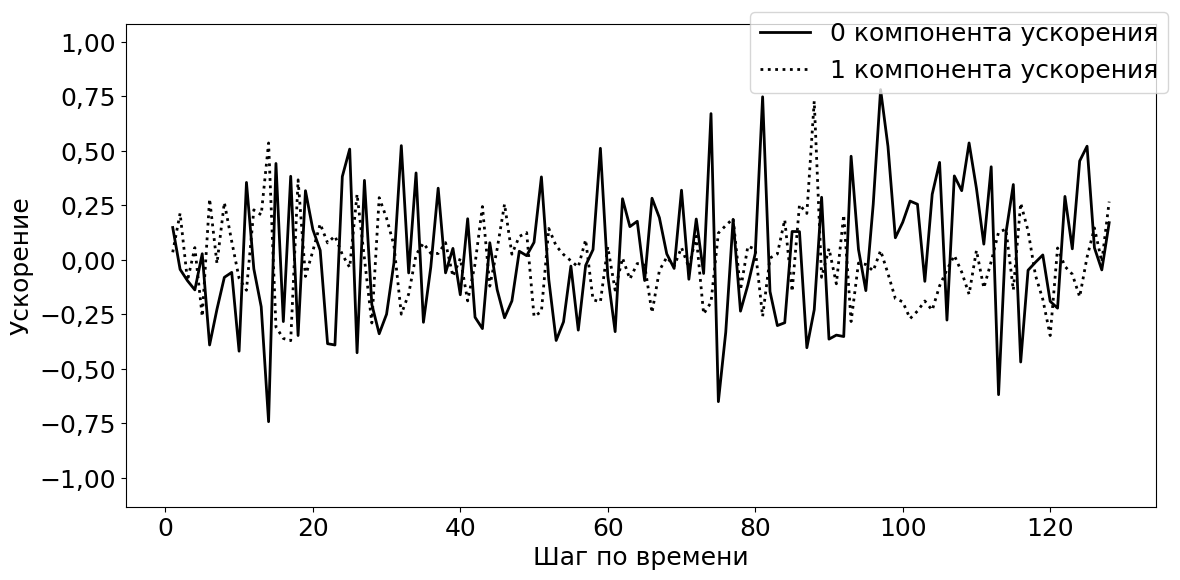

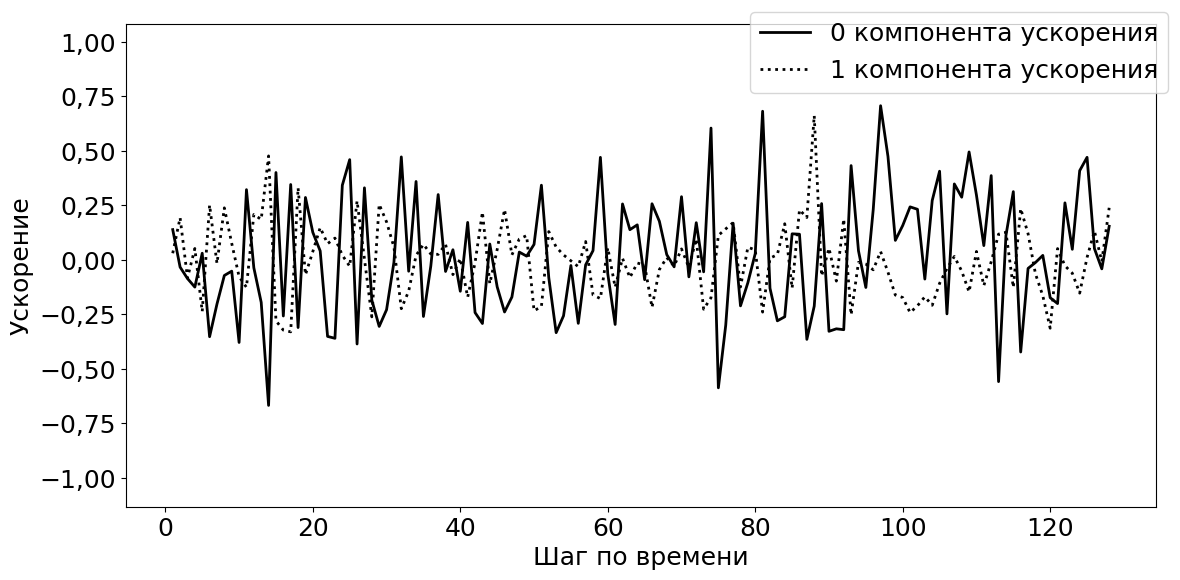

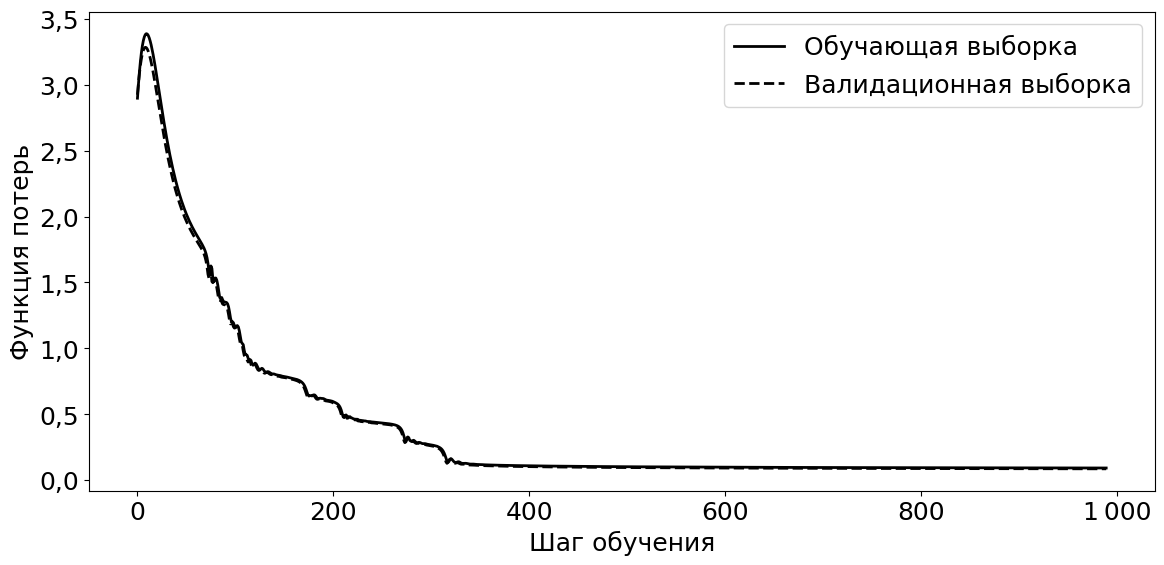

In [7]:
import sklearn
import sklearn.preprocessing
import sklearn.model_selection
for i in range(start_idx, start_idx+ n):
    name = experiment_name + f'_{i + 1}.pickle'
    
    path = Path(TRAIN_DATASET_PATH, name)

    with open(path, 'rb') as f:
            data = pickle.load(f)
    
    training_data_X, test_data_X, training_data_y, test_data_y  = sklearn.model_selection.train_test_split(data[0], data[1])
 
    acc_scaler = sklearn.preprocessing.MaxAbsScaler()
    training_data_y = acc_scaler.fit_transform(training_data_y)
    test_data_y = acc_scaler.transform(test_data_y)

    vel_scaler = sklearn.preprocessing.MaxAbsScaler()
    training_data_X = vel_scaler.fit_transform(training_data_X)
    test_data_X = vel_scaler.transform(test_data_X)

    training_data_X, training_data_y = torch.FloatTensor(training_data_X), torch.FloatTensor(training_data_y)
    test_data_X, test_data_y = torch.FloatTensor(test_data_X), torch.FloatTensor(test_data_y)
    

    training_dataset = LNNDataset(training_data_X, training_data_y)
    test_dataset = LNNDataset(test_data_X, test_data_y)
    
    #print(training_dataset.features)

    training_dataloader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
    test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
    
    lnnclassifier.train_torch.train_model(name, training_dataloader, test_dataloader, epochs, deg_of_freedom, device, log_dir)
    print(f"======== {name} ========")
    
    
print("======== done! =========")

In [ ]:
lnnclassifier.train_torch.plot_loss(train_losses=torch.load(log_dir + experiment_name +))

# Обработка данных

Подключаем необходимые библиотеки

In [ ]:
#X, y = lnnclassifier.trajectories_classifing.get_data(0, 1299, targets, experiment_name)

In [9]:
import torch
from pathlib import Path
import numpy as np

Для ускорения вычислений, если это возможно будем использовать GPU

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
deg_of_freedom = 9
experiment_name = "experiment4"

Необходимо заранее определить пробные точки в которых мы будем смотреть значения лагранжиана, они единые для всех функций

sampleSize является гиперпараметром, чем выше плотность точек тем точнее приближение, поэтому его можно свободно подбирать

In [ ]:
sampleSize = 20000
def get_transform_vector(x_start, x_end, N, deg_of_freedom):
    q = torch.distributions.uniform.Uniform(x_start, x_end).rsample((N, 2 * deg_of_freedom))
    print(q)
    return q

transformation_vector = get_transform_vector(-10, 10, sampleSize, 9).to(device)


tensor([[-2.7233, -8.4469,  9.2435,  ..., -8.4377,  6.3461, -7.3924],
        [-9.9505,  3.5280,  9.3101,  ...,  1.0375,  4.8467,  5.1832],
        [ 6.0605, -7.6177, -9.8649,  ...,  0.3123, -9.4507,  4.6114],
        ...,
        [-5.2984,  2.8485, -5.1637,  ..., -2.1754,  7.7472, -1.7616],
        [-5.9533, -3.3573,  6.0715,  ...,  2.8249, -1.0407,  8.7094],
        [ 6.6526, -6.1883,  4.4691,  ..., -4.8068, -1.0325,  7.9381]])


В классификаторы мы уже будем подавать уже преобразованные признаки, которые соответствуют лагранжианам

In [19]:
X = []

In [26]:
import lnnclassifier.train_torch
model = lnnclassifier.train_torch.NeuralNetwork(deg_of_freedom).to(device)

In [27]:
from tqdm import tqdm
from torch.utils.data import DataLoader

Использование тензорных ядер несколько ускоряет процесс получения признаков, т.к. в коде активно используется матричное умножение

In [21]:
torch.backends.cuda.matmul.allow_tf32 = True
torch.backends.cudnn.allow_tf32 = True

Для получение признаков лучше всего разделить пробные точки на отдельные батчи, если считать сразу для всех 20000 прообных точек, то используется около 10 ГБ памяти

In [11]:
#first, end = 0, 1345
first, end = 0, 1000

In [ ]:
torch.save(transformation_vector, "transformation_vector.pt")

In [30]:
transformation_vector =  torch.load("transformation_vector.pt")

In [ ]:
batch_size = 10000

id_list = range(first, end)
transformation_vector_sampler = DataLoader(transformation_vector, batch_size=batch_size, shuffle=False)
for i in tqdm(id_list, desc="Loading", unit="model"):
    with open(Path("code/logs", f"{experiment_name}_{i + 1}.pickle"), 'rb') as handle:
        model.load_state_dict(torch.load(handle))
    y_pred = []
    for x in transformation_vector_sampler:
        y_pred += lnnclassifier.train_torch.get_acc(model, x, deg_of_freedom, device).to(torch.device("cpu")).detach().tolist()
    y_pred = np.array(y_pred)
    X.append(y_pred)

Loading:   0%|          | 0/1000 [00:00<?, ?model/s]


AttributeError: 'Tensor' object has no attribute 'Tc'

In [ ]:
torch.save(X, "lagrangian_predictions.pt")

In [22]:
X = torch.load("lagrangian_predictions.pt")

In [23]:
X = np.array(X)

In [24]:
X.shape

(1000, 20000, 9)

In [25]:
X.shape[0]

1000

In [26]:
X = X.reshape(X.shape[0], -1)

In [27]:
X.shape

(1000, 180000)

In [28]:
y = np.array(targets[first: end])

Объекты - лагранжианы, представленные в виде коэфициентов для лагражевой нейронной сети.

In [29]:
X.shape

(1000, 180000)

Метки классов для объектов

In [30]:
y.shape

(1000,)

Разделение выборки для обучения

In [12]:
random_state = 124

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_state, shuffle = True)

In [32]:
X_train.shape

(800, 180000)

In [33]:
X_test.shape

(200, 180000)

## Классификация

Применяем метод главных коэффицентов для параметров нейросети, чтобы уменьшить их размерность

In [46]:
#torch.save((X_test, X_train, y_test, y_train), "classification_data.pt")

In [7]:
X_test, X_train, y_test, y_train = torch.load("classification_data.pt")

In [8]:
import lnnclassifier.trajectories_classifing

In [9]:
X_train_transformed,  X_test_transformed, pca = lnnclassifier.trajectories_classifing.transform_data(X_train, X_test)

In [10]:
pca.explained_variance_ratio_

array([0.08532241, 0.07164077, 0.05381729, 0.03095274, 0.03064925,
       0.02658523, 0.02316077, 0.019394  , 0.01615315, 0.01389392,
       0.01226406, 0.0115463 , 0.00968372, 0.00910898, 0.00880826,
       0.00865581, 0.00759459])

Исследуем выборку и посмотрим насколько хорошо разделяются данные по двум главным признакам для основных активностей

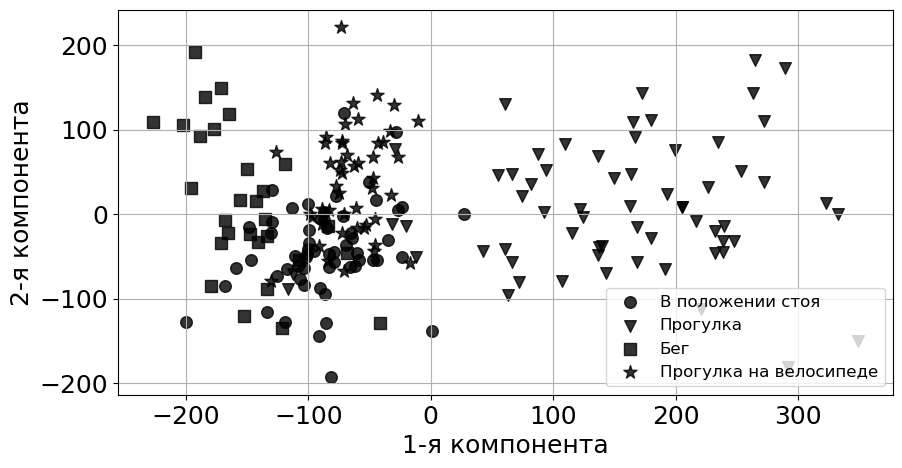

In [16]:


plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 6
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = 18


X_standing = X_train_transformed[np.where(y_train == 3)]
X_walking = X_train_transformed[np.where(y_train == 4)]
X_running = X_train_transformed[np.where(y_train == 5)]
X_cycling = X_train_transformed[np.where(y_train == 6)]

X_standing_test = X_test_transformed[np.where(y_test == 3)]
X_walking_test = X_test_transformed[np.where(y_test == 4)]
X_running_test = X_test_transformed[np.where(y_test == 5)]
X_cycling_test = X_test_transformed[np.where(y_test == 6)]




#plt.scatter(X_standing[:, 1], X_standing[:, 16], alpha = 0.5, color = "green", label = "Standing")
#plt.scatter(X_walking[:, 1], X_walking[:, 16], alpha = 0.5, color = 'red', label = "Walking")
#plt.scatter(X_running[:, 1], X_running[:, 16], alpha = 0.5, color = 'blue', label = "Running")
#plt.scatter(X_cycling[:, 1], X_cycling[:, 16], alpha = 0.5, color = 'orange', label = "Cycling")

plt.scatter(X_standing_test[:, 0], X_standing_test[:, 5], s = 70, marker = "o", alpha = 0.8, color = "black", label = "В положении стоя")
plt.scatter(X_walking_test[:, 0], X_walking_test[:, 5], s = 70, marker = "v", alpha = 0.8, color = "black", label = "Прогулка")
plt.scatter(X_running_test[:, 0], X_running_test[:, 5], s = 70, marker = "s", alpha = 0.8, color = "black", label = "Бег")
plt.scatter(X_cycling_test[:, 0], X_cycling_test[:, 5], s = 100, marker = "*", alpha = 0.8, color = "black", label = "Прогулка на велосипеде")

plt.xlabel("1-я компонента")
plt.ylabel("2-я компонента")
plt.grid()
plt.legend(fontsize = 12)
plt.savefig(Path("code/figures", "Data.pdf"), bbox_inches="tight")
plt.savefig(Path("code/figures", "Data.png"), bbox_inches="tight")
plt.show()

Уже по двум параметрам наиболее непохожие активности хорошо разделяются

Исследуем выборку и посмотрим насколько хорошо разделяются данные по трем главным параметрам для основных активностей

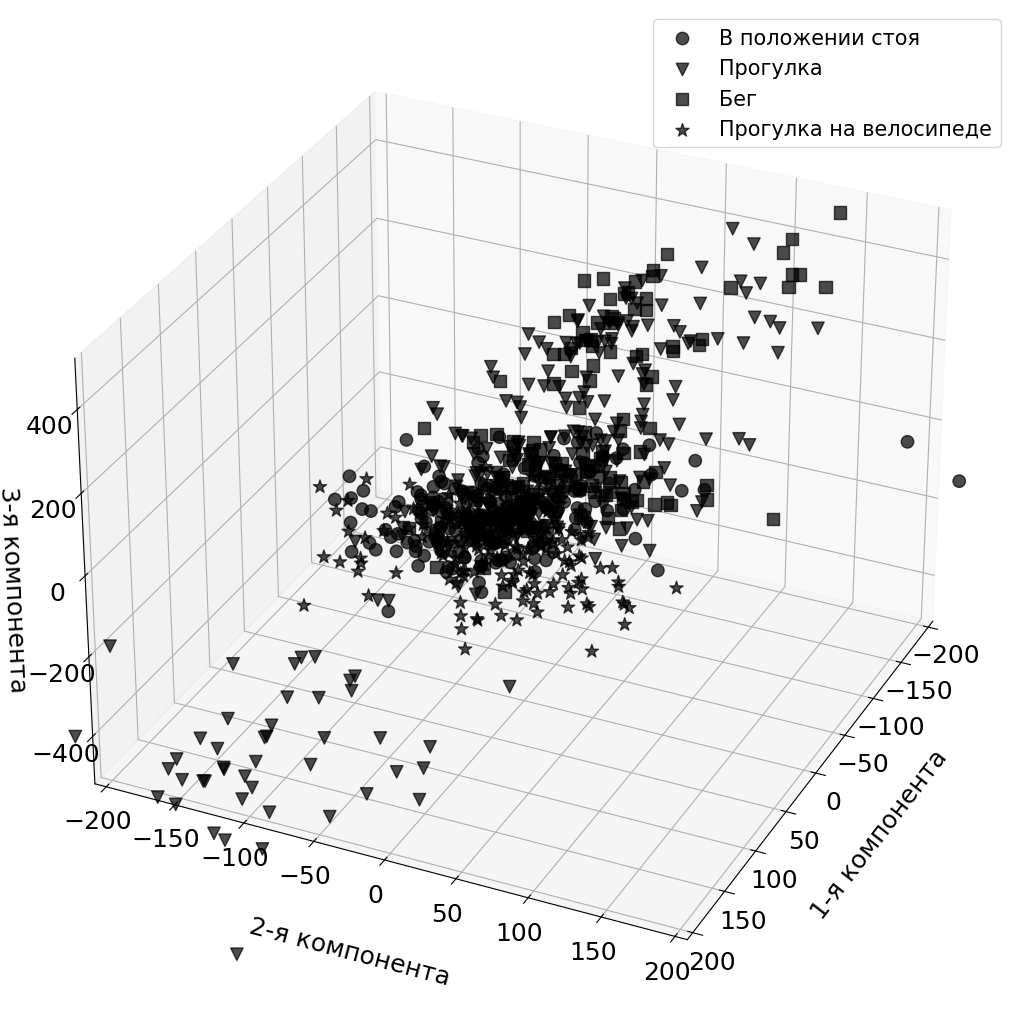

In [17]:
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 6
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['axes.titlesize'] = 32
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['font.size'] = 18

fig = plt.figure(figsize = (13, 13))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlim(-200,200)
ax.set_ylim(-200,200)
ax.set_zlim(-500,500)


X_standing = X_train_transformed[np.where(y_train == 3)]
X_walking = X_train_transformed[np.where(y_train == 4)]
X_running = X_train_transformed[np.where(y_train == 5)]
X_cycling = X_train_transformed[np.where(y_train == 6)]

X_standing_test = X_test_transformed[np.where(y_test == 3)]
X_walking_test = X_test_transformed[np.where(y_test == 4)]
X_running_test = X_test_transformed[np.where(y_test == 5)]
X_cycling_test = X_test_transformed[np.where(y_test == 6)]



ax.scatter(X_standing[:, 1], X_standing[:, 16], X_standing[:, 6], s = 80, marker = "o", color="black", label = "В положении стоя", alpha = 0.7)
ax.scatter(X_walking[:, 1], X_walking[:, 16], X_walking[:, 6], s = 80, marker = "v", color="black", label = "Прогулка", alpha = 0.7)
ax.scatter(X_running[:, 1], X_running[:, 16], X_running[:, 6], s = 80, marker = "s", color="black", label = "Бег", alpha = 0.7)
ax.scatter(X_cycling[:, 1], X_cycling[:, 16], X_cycling[:, 6], s = 100, marker = "*", color="black", label = "Прогулка на велосипеде", alpha = 0.7)

#ax.scatter(X_standing_test[:, 0], X_standing_test[:, 1], X_standing_test[:, 5], alpha = 0.5, color = "green")
#ax.scatter(X_walking_test[:, 0], X_walking_test[:, 1], X_walking_test[:, 5], alpha = 0.5, color = 'red')
#ax.scatter(X_running_test[:, 0], X_running_test[:, 1], X_running_test[:, 5], alpha = 0.5, color = 'blue')
#ax.scatter(X_cycling_test[:, 0], X_cycling_test[:, 1], X_cycling_test[:, 5], alpha = 0.5, color = 'orange')


ax.view_init(30, 25)
ax.set_xlabel("1-я компонента", labelpad = 20.)
ax.set_ylabel("2-я компонента", labelpad = 25.)
ax.set_zlabel("3-я компонента", labelpad = 9.)
plt.legend(fontsize = 15)
plt.savefig(Path("code/figures", "Data_3D.png"), bbox_inches="tight")
plt.savefig(Path("code/figures", "Data_3D.pdf"), bbox_inches="tight")
plt.show()

По трем главным параметрам большинство активностей разделимы

In [36]:
X_train_transformed,  X_test_transformed, pca = lnnclassifier.trajectories_classifing.transform_data(X_train, X_test, 20)

In [37]:
X_train_transformed.shape

(800, 20)

In [38]:
X_test_transformed.shape

(200, 20)

In [39]:
pca.explained_variance_ratio_

array([0.08532241, 0.07164077, 0.05381729, 0.03095274, 0.03064925,
       0.02658523, 0.02316077, 0.019394  , 0.01615316, 0.01389392,
       0.01226404, 0.01154639, 0.00968375, 0.00911075, 0.00881505,
       0.00865509, 0.00759456, 0.00735672, 0.00672647, 0.0066908 ])

In [40]:
X_transformed = np.concatenate((X_train_transformed,X_test_transformed))

In [41]:
y_transforemed = np.concatenate((y_train, y_test))

In [42]:
X_transformed.shape

(1000, 20)

Теперь применим несколько алгоритмов классификации, чтобы найти лучший

Логистическая регрессия

In [48]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score

In [64]:
def scores(estimator, X_test, y_test):
    metrics = {}
    y_pred = estimator.predict(X_test)
    metrics['accuracy'] = accuracy_score(y_test, y_pred)
    metrics['balanced_accuracy'] = balanced_accuracy_score(y_test, y_pred)
    metrics['f1_macro'] = f1_score(y_test, y_pred, average = 'macro')
    return metrics

In [65]:
regression = LogisticRegression(C=1.0)
#regression.fit(X_train_transformed, y_train)

#y_pred = regression.predict(X_test_transformed)
#acc_score = accuracy_score(y_test, y_pred)
cv_results = cross_validate(regression, X_transformed, y_transforemed, cv = 5, scoring=scores)

/home/sasha/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sasha/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

In [66]:
for key in cv_results:
    value = cv_results[key]
    print(f"{key} mean = {value.mean()} with std = {value.std()}")

fit_time mean = 0.018615007400512695 with std = 0.0015341902294259053
score_time mean = 0.001745748519897461 with std = 0.00030704763900426965
test_accuracy mean = 0.9270000000000002 with std = 0.013638181696985838
test_balanced_accuracy mean = 0.9242117199848616 with std = 0.01324363221603227
test_f1_macro mean = 0.9265818839081778 with std = 0.013742575966656416


Гауссовский процесс

In [140]:
gpc = GaussianProcessClassifier(kernel= RBF(1000), random_state=random_state,multi_class ='one_vs_one')
#gpc.fit(X_train_transformed, y_train)

#y_pred = gpc.predict(X_test_transformed)
#acc_score = accuracy_score(y_test, y_pred)
cv_results = cross_validate(gpc, X_transformed, y_transforemed, cv = 5, scoring=scores)

In [141]:
for key in cv_results:
    value = cv_results[key]
    print(f"{key} mean = {value.mean()} with std = {value.std()}")

fit_time mean = 0.8380852699279785 with std = 0.02292794928889883
score_time mean = 0.026877403259277344 with std = 0.0024131007671144757
test_accuracy mean = 0.9460000000000001 with std = 0.009695359714832642
test_balanced_accuracy mean = 0.9410141385807584 with std = 0.010761180053028799
test_f1_macro mean = 0.9459720911218966 with std = 0.009879489088313381


In [ ]:
acc_score

0.24

Случайный лес

In [70]:
forest = RandomForestClassifier(n_estimators=1000)
#forest.fit(X_train_transformed, y_train)

#y_pred = forest.predict(X_test_transformed)
#acc_score = accuracy_score(y_test, y_pred)
cv_results = cross_validate(forest, X_transformed, y_transforemed, cv = 5, scoring=scores)

In [71]:
for key in cv_results:
    value = cv_results[key]
    print(f"{key} mean = {value.mean()} with std = {value.std()}")

fit_time mean = 1.5697606086730957 with std = 0.016693652632834278
score_time mean = 0.0491943359375 with std = 0.0014878670466031286
test_accuracy mean = 0.932 with std = 0.007483314773547842
test_balanced_accuracy mean = 0.928585304558306 with std = 0.00796782799697298
test_f1_macro mean = 0.9326650441098874 with std = 0.007692893246150245


In [ ]:
acc_score

0.935

К-ближайших соседей

In [72]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
#knn.fit(X_train_transformed, y_train)
#y_pred = knn.predict(X_test_transformed)
#acc_score = accuracy_score(y_test, y_pred)
cv_results = cross_validate(knn, X_transformed, y_transforemed, cv = 5, scoring=scores)

In [73]:
for key in cv_results:
    value = cv_results[key]
    print(f"{key} mean = {value.mean()} with std = {value.std()}")

fit_time mean = 0.00034842491149902346 with std = 7.099271011783309e-06
score_time mean = 0.010348367691040038 with std = 0.0030797236480114747
test_accuracy mean = 0.9390000000000001 with std = 0.00860232526704259
test_balanced_accuracy mean = 0.9345802343207673 with std = 0.00925462146646057
test_f1_macro mean = 0.9404572211618468 with std = 0.008068436480596181


In [142]:
knn.fit(X_train_transformed, y_train)
y_pred = knn.predict(X_test_transformed)


SVC с гауссовским ядром

In [127]:
from sklearn import svm
#svc = svm.SVC(kernel='linear')
svc = svm.SVC(kernel=RBF(1000))
#svc.fit(X_train_transformed, y_train)
#y_pred = svc.predict(X_test_transformed)
#acc_score = accuracy_score(y_pred, y_test)
cv_results = cross_validate(svc, X_transformed, y_transforemed, cv = 5, scoring=scores)

In [128]:
for key in cv_results:
    value = cv_results[key]
    print(f"{key} mean = {value.mean()} with std = {value.std()}")

fit_time mean = 0.008562564849853516 with std = 0.001326759312924887
score_time mean = 0.003683137893676758 with std = 0.0007571205232121906
test_accuracy mean = 0.933 with std = 0.011224972160321799
test_balanced_accuracy mean = 0.9274403927068724 with std = 0.01283762900137306
test_f1_macro mean = 0.9338982734401119 with std = 0.011016990667245855


In [ ]:
y_pred.shape

(200,)

In [ ]:
print(acc_score)

0.32


Исследуем как ведут себя эти методы для разного количества главных компонент

In [ ]:
#x, y_1, y_2, y_3, y_4, y_train_1, y_train_2, y_train_3, y_train_4 =  lnnclassifier.trajectories_classifing.compareClassifiresperPCA(1, 100, X_train, X_test, y_train, y_test , random_state)

  0%|          | 0/99 [00:00<?, ?it/s]

100%|██████████| 99/99 [08:42<00:00,  5.27s/it]


In [13]:
x, y_1, y_2, y_3, y_4, y_5, y_1_std, y_2_std, y_3_std, y_4_std, y_5_std =  lnnclassifier.trajectories_classifing.compareClassifiresperPCA(1, 40, X_train, X_test, y_train, y_test , random_state)

100%|██████████| 39/39 [10:23<00:00, 15.99s/it]


Сохраняем результаты классификации

In [14]:
torch.save((x, y_1, y_2, y_3, y_4, y_5, y_1_std, y_2_std, y_3_std, y_4_std, y_5_std), "classification_results.pt")

Загружаем результаты классификации

In [ ]:
#x, y_1, y_2, y_3, y_4, y_5, y_train_1, y_train_2, y_train_3, y_train_4, y_5_std = torch.load("classification_results.pt")

In [15]:
x, y_1, y_2, y_3, y_4, y_5, y_1_std, y_2_std, y_3_std, y_4_std, y_5_std = np.array(x),  np.array(y_1),  np.array(y_2),  np.array(y_3),  np.array(y_4),  np.array(y_5), np.array(y_1_std),  np.array(y_2_std),  np.array(y_3_std),  np.array(y_4_std), np.array(y_5_std)

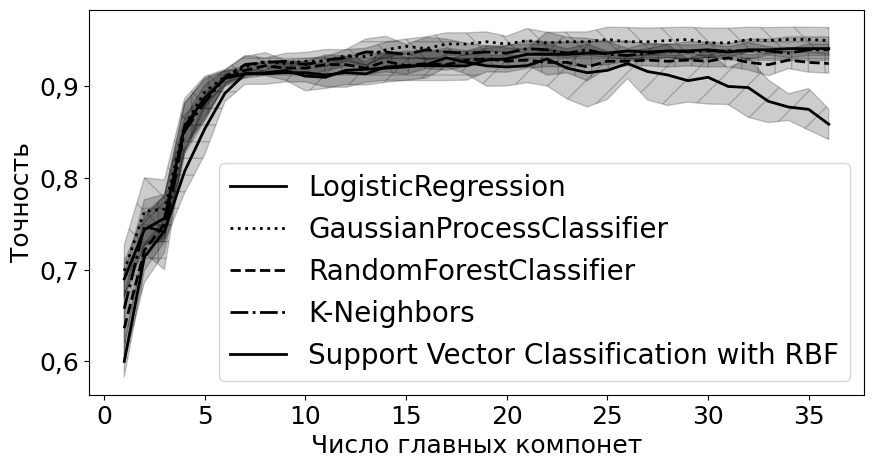

In [19]:
k = 35

plt.rcdefaults()
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 6
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['font.size'] = 18
plt.rcParams['axes.formatter.use_locale'] = True

plt.figure(figsize = (10, 5))

plt.plot(x[:k + 1], y_1[:k + 1], color="black", linestyle = 'solid', label = "LogisticRegression")
plt.fill_between(x[:k + 1], y_1[:k + 1] - y_1_std[:k + 1], y_1[:k + 1] + y_1_std[:k + 1], alpha=0.2, hatch = '/', color="black")
plt.plot(x[:k + 1], y_2[:k + 1], color="black", linestyle = 'dotted', label = "GaussianProcessClassifier")
plt.fill_between(x[:k + 1], y_2[:k + 1] - y_2_std[:k + 1], y_2[:k + 1] + y_2_std[:k + 1], alpha=0.2, hatch = '\\', color="black")
plt.plot(x[:k + 1], y_3[:k + 1], color="black", linestyle = 'dashed', label = "RandomForestClassifier")
plt.fill_between(x[:k + 1], y_3[:k + 1] - y_3_std[:k + 1], y_3[:k + 1] + y_3_std[:k + 1], alpha=0.2, hatch = '|', color="black")
plt.plot(x[:k + 1], y_4[:k + 1], color="black", linestyle = 'dashdot', label = "K-Neighbors")
plt.fill_between(x[:k + 1], y_4[:k + 1] - y_4_std[:k + 1], y_4[:k + 1] + y_4_std[:k + 1],  alpha=0.2, hatch = '-', color="black")
plt.plot(x[:k + 1], y_5[:k + 1], color="black", linestyle = 'solid', label = "Support Vector Classification with RBF")
plt.fill_between(x[:k + 1], y_5[:k + 1] - y_5_std[:k + 1], y_5[:k + 1] + y_5_std[:k + 1],  alpha=0.2, hatch = '-', color="black")
#plt.plot(x[:k + 1], y_train_1[:k + 1], color="black", linestyle = '--',   label = "LogisticRegression(Train)")
#plt.plot(x[:k + 1], y_train_2[:k + 1], color="black", linestyle = '--', label = "GaussianProcessClassifier(Train)")
#plt.plot(x[:k + 1], y_train_3[:k + 1], color="black", linestyle = '--', label = "RandomForestClassifier(Train)")
#plt.plot(x[:k + 1], y_train_4[:k + 1], color="black", linestyle = '--', label = "Support Vector Classification with RBF(Train)")
plt.xlabel("Число главных компонет")
plt.ylabel("Точность")
plt.legend(fontsize = 20)
plt.savefig(Path("code/figures", "Accuracy.png"), bbox_inches="tight")
plt.savefig(Path("code/figures", "Accuracy.pdf"), bbox_inches="tight")
plt.show()

In [ ]:
import sklearn.metrics.balanced_accuracy_score

Стабильнее всего обучается SVC на нем остутствует переобучение и он показывает результаты сравнимые с остальными классификаторами, гауссовская переобучается, поэтому абслоютно не подходит под модель. Очень хорошо показывает себя случайный лес, что ожидаемо, т.к. модель данных сложная

###  Случайный лес

Окончательно выберем случайный лес и построим классификатор на его основе

In [ ]:
X_train_transformed,  X_test_transformed = lnnclassifier.trajectories_classifing.transform_data(X_train, X_test, 50)

In [ ]:
forest = RandomForestClassifier(n_estimators=300)
forest.fit(X_train_transformed, y_train)

y_pred = forest.predict(X_test_transformed)

acc_score = accuracy_score(y_test, y_pred)

In [ ]:
acc_score 

0.9479553903345725

LNN-классификтор показывает результат в 95%, что подтверждает нашу гипотезу о том, что лагранжианы лежат в разных классах для разных действий

###  Наивный метод

Для сравнения приведем результаты классификации траекторий "наивным" методом

In [ ]:
X_series = []
a = 500
for i in range(0, len(all_velocities)):
    X_series.append(all_velocities[i][:a][1])
X_series = np.array(X_series)
y = np.array(targets)

In [ ]:
X_series.shape

(1372, 9)

In [ ]:
print(np.where(y == 3)[0].shape)
print(np.where(y == 4)[0].shape)
print(np.where(y == 5)[0].shape)
print(np.where(y == 6)[0].shape)

(377,)
(475,)
(194,)
(326,)


In [ ]:

from sklearn.model_selection import GridSearchCV

from sktime.classification.interval_based import TimeSeriesForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_series, y)
classifier = TimeSeriesForestClassifier(n_estimators=100)
classifier.fit(X_train, y_train)
param_grid = {"n_estimators": np.linspace(1, 10, 100, dtype = int)}
grid = GridSearchCV(classifier, param_grid=param_grid, cv=3)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7871720116618076


Результат в 78% намного меньше чем у LNN-классификатора